In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Electric_Production.csv", index_col = 0)
data

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.columns = ["Energy Production"]

<Axes: xlabel='DATE'>

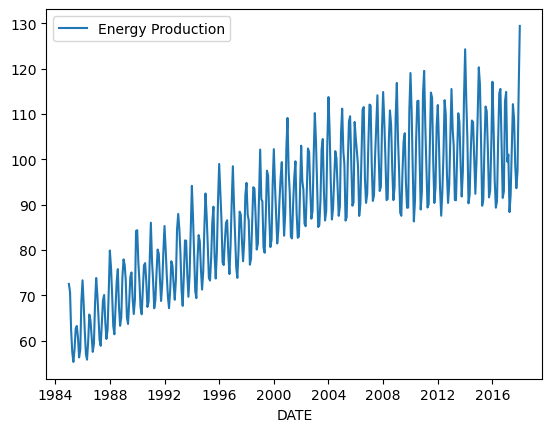

In [5]:
sns.lineplot(data = data)

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics : {}".format(result[0]))
    print("p- value: {}".format(result[1]))
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis , reject the null hypothesis")
    else:
        print("weakened evidence against null hypothesis , time series has a unit root , indicating it is non-stationary")

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

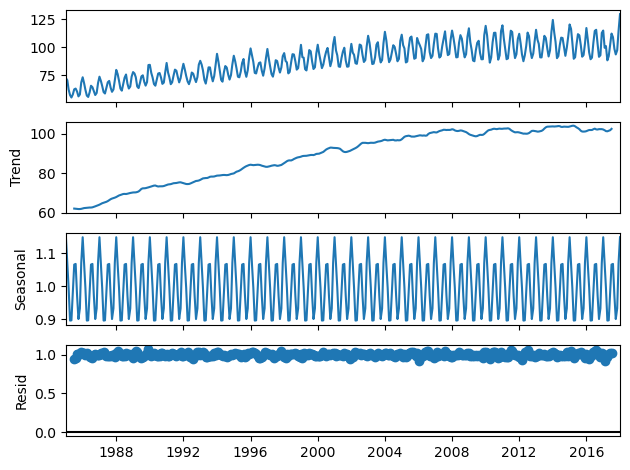

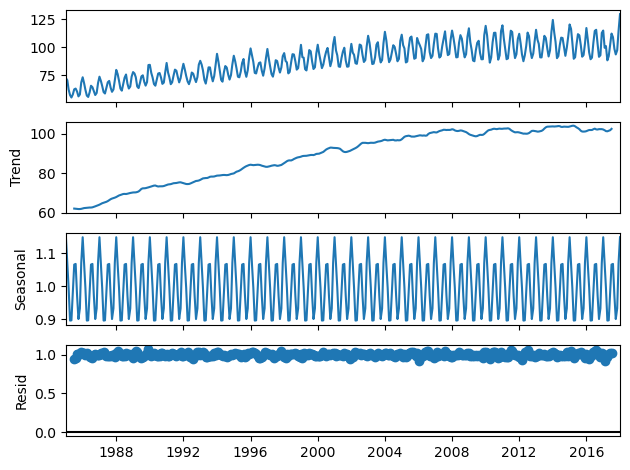

In [9]:
result = seasonal_decompose(data , model = "multiplicative")
result.plot()

# Holts winter meathod

In [10]:
m = 12
alpha = 1/(2*m)

In [11]:
# Single exponential smoothing

In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [13]:
#Double or tripple Exponmential smoothing

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#  Holts winter exponential smoothing

In [15]:
data["HWSE1"] = SimpleExpSmoothing(data["Energy Production"]).fit(smoothing_level = alpha).fittedvalues

C:\Users\chaks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\chaks\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [16]:
data.head()

,Energy Production,HWSE1
DATE,,
1985-01-01,72.5052,72.505200
1985-02-01,70.6720,72.505200
1985-03-01,62.4502,72.428817
1985-04-01,57.4714,72.013041
1985-05-01,55.3151,71.407139


<Axes: xlabel='DATE'>

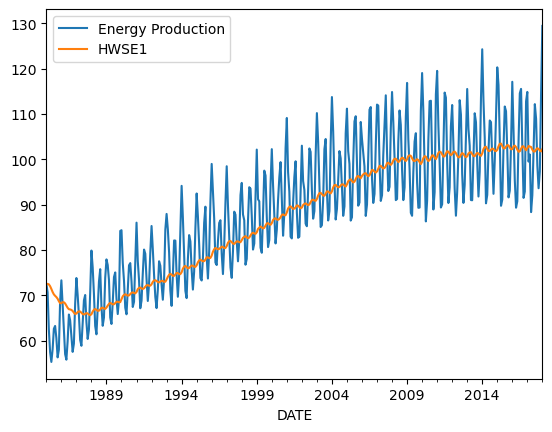

In [17]:
data[["Energy Production" , "HWSE1"]].plot()

In [18]:
data["HWES1 Add"] = ExponentialSmoothing(data["Energy Production"] , trend = "add").fit().fittedvalues

C:\Users\chaks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
data

,Energy Production,HWSE1,HWES1 Add
DATE,,,
1985-01-01,72.5052,72.505200,73.474298
1985-02-01,70.6720,72.505200,72.646357
1985-03-01,62.4502,72.428817,70.813157
1985-04-01,57.4714,72.013041,62.591357
1985-05-01,55.3151,71.407139,57.612557
...,...,...,...
2017-09-01,98.6154,102.442055,109.072357
2017-10-01,93.6137,102.282611,98.756557
2017-11-01,97.3359,101.921406,93.754857


In [20]:
 data["HWES1 mul"] = ExponentialSmoothing(data["Energy Production"] , trend = "mul").fit().fittedvalues

C:\Users\chaks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
data.head()

,Energy Production,HWSE1,HWES1 Add,HWES1 mul
DATE,,,,
1985-01-01,72.5052,72.505200,73.474298,77.425192
1985-02-01,70.6720,72.505200,72.646357,71.775424
1985-03-01,62.4502,72.428817,70.813157,69.939161
1985-04-01,57.4714,72.013041,62.591357,61.791893
1985-05-01,55.3151,71.407139,57.612557,56.832161


<Axes: xlabel='DATE'>

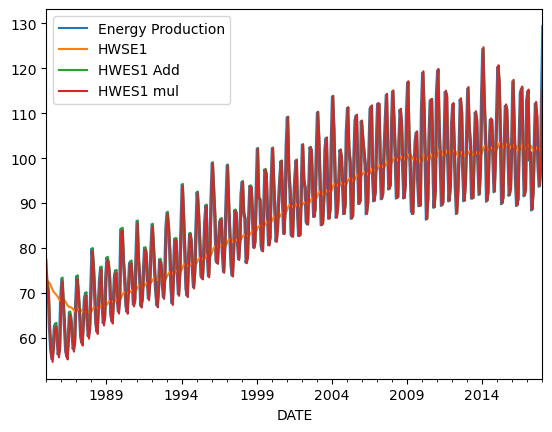

In [22]:
data[["Energy Production" , "HWSE1" , "HWES1 Add" , "HWES1 mul"]].plot()

In [23]:
data.head()

,Energy Production,HWSE1,HWES1 Add,HWES1 mul
DATE,,,,
1985-01-01,72.5052,72.505200,73.474298,77.425192
1985-02-01,70.6720,72.505200,72.646357,71.775424
1985-03-01,62.4502,72.428817,70.813157,69.939161
1985-04-01,57.4714,72.013041,62.591357,61.791893
1985-05-01,55.3151,71.407139,57.612557,56.832161


 Triple HWES

In [24]:
 data["HWES2 add"] = ExponentialSmoothing(data["Energy Production"] , trend = "add" , seasonal = "add" , seasonal_periods = 12).fit().fittedvalues

C:\Users\chaks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
 data["HWES2 mul"] = ExponentialSmoothing(data["Energy Production"] , trend = "mul"  , seasonal = "mul", seasonal_periods = 12).fit().fittedvalues

C:\Users\chaks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
data.head()

,Energy Production,HWSE1,HWES1 Add,HWES1 mul,HWES2 add,HWES2 mul
DATE,,,,,,
1985-01-01,72.5052,72.505200,73.474298,77.425192,72.900789,73.233121
1985-02-01,70.6720,72.505200,72.646357,71.775424,68.885083,67.464745
1985-03-01,62.4502,72.428817,70.813157,69.939161,63.994791,64.979177
1985-04-01,57.4714,72.013041,62.591357,61.791893,57.572899,56.924906
1985-05-01,55.3151,71.407139,57.612557,56.832161,56.431917,57.609377


<Axes: xlabel='DATE'>

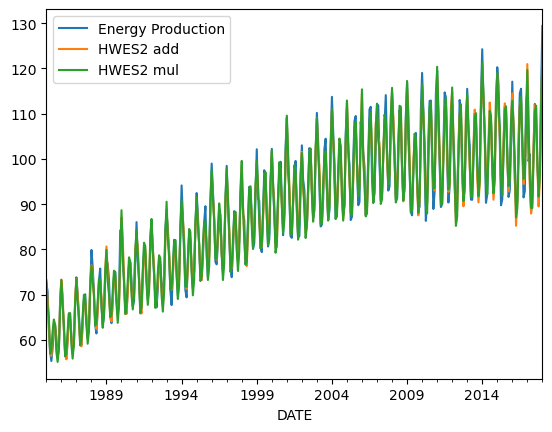

In [27]:
data[["Energy Production" , "HWES2 add" , "HWES2 mul"]].plot()

In [28]:
train = data.loc["1985 - 01 - 01" : "2015 - 12 - 01"]
test = data.loc["2016 - 01 - 01" : ]

In [29]:
len(test)

25

In [30]:
model = ExponentialSmoothing(train["Energy Production"] , trend = "mul"  , seasonal = "mul", seasonal_periods = 12).fit()

C:\Users\chaks\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
predictions = model.forecast(25)

In [32]:
predictions

2016-01-01    112.454864
2016-02-01    104.738198
2016-03-01     97.642441
2016-04-01     87.765088
2016-05-01     88.093408
2016-06-01     96.968743
2016-07-01    105.251885
2016-08-01    105.560294
2016-09-01     95.808541
2016-10-01     88.797655
2016-11-01     92.034269
2016-12-01    105.752728
2017-01-01    113.535018
2017-02-01    105.744231
2017-03-01     98.580318
2017-04-01     88.608091
2017-05-01     88.939565
2017-06-01     97.900149
2017-07-01    106.262853
2017-08-01    106.574224
2017-09-01     96.728803
2017-10-01     89.650576
2017-11-01     92.918278
2017-12-01    106.768506
2018-01-01    114.625547
Freq: MS, dtype: float64

<Axes: xlabel='DATE'>

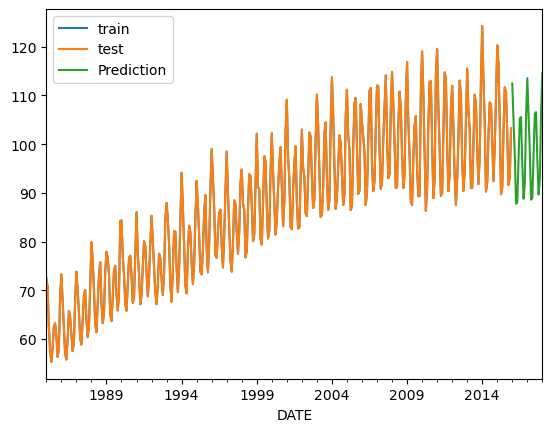

In [33]:
train["Energy Production"].plot(legend = True , label = "train")                         
train["Energy Production"].plot(legend = True , label = "test")   
predictions.plot(legend = True , label = "Prediction")

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
rmse = np.sqrt(mean_squared_error(test["Energy Production"] , predictions))

In [36]:
rmse

5.714361852323713